# Question 1 : KNN

***From sklearn.datasets load digits dataset and do following:***

>1. Classify digits (0 to 9) using KNN classifier. You can use different
values for k neighbors and need to figure out a value of K that gives
you a maximum score. You can manually try different values of K or
use gridsearchcv
>2. Plot confusion matrix
>3. Plot classification report

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd
import time
import numpy as np

%matplotlib inline

In [4]:
#fetching data
X_raw, y = fetch_openml('mnist_784', version=1, as_frame=False, return_X_y=True)
print("X_raw",X_raw.shape)
print("y",y.shape)

X_raw (70000, 784)
y (70000,)


Text(0.5, 1.0, '4')

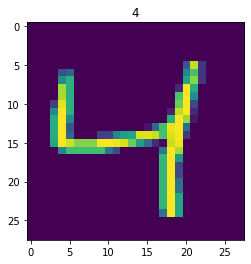

In [5]:
#plotting a sample
sample = X_raw[2].reshape(28,28)
plt.imshow(sample)
plt.title(y[2])

In [6]:
#standardizing dataset
X = X_raw/255

In [7]:
n_train = 65000
n_test = 5000

X_train, y_train = X[:n_train], y[:n_train]
X_test, y_test = X[n_train:], y[n_train:]

print("X_train",X_train.shape,"y_train",y_train.shape)
print("X_test",X_test.shape,"y_test",y_test.shape)

X_train (65000, 784) y_train (65000,)
X_test (5000, 784) y_test (5000,)


In [8]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def get_classifier(n):
    knn = KNeighborsClassifier(algorithm='auto', n_neighbors=n)
    knn.fit(X_train_df,y_train_df)
    return knn

def get_metric(classifier):
    y_pred = classifier.predict(X_test_df)
    return accuracy_score(y_test_df,y_pred)

In [ ]:
neighbors = []
accuracy = []

for i in range(1,100):
  k = get_classifier(i)
  m = get_metric(k)
  neighbors.append(i)
  accuracy.append(m)


In [ ]:
print(neighbors)
print(accuracy)

In [10]:
#copied to avoid re-execution
neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
accuracy = [0.9834, 0.9812, 0.985, 0.9828, 0.9836, 0.9832, 0.9844, 0.9818, 0.9824, 0.9814, 0.9832, 0.9818, 0.9818, 0.9812, 0.9816, 0.9798, 0.98, 0.9798, 0.98, 0.9794, 0.9794, 0.9788, 0.9798, 0.978, 0.9792, 0.9788, 0.9788, 0.9778, 0.978, 0.9772, 0.9774, 0.9764, 0.9766, 0.9756, 0.9758, 0.9752, 0.9758, 0.9756, 0.9756, 0.9754, 0.9752, 0.9752, 0.9748, 0.9746, 0.975, 0.9744, 0.9742, 0.9736, 0.973, 0.973, 0.973, 0.9726, 0.9724, 0.9726, 0.972, 0.972, 0.9724, 0.9716, 0.9726, 0.9716, 0.9718, 0.9716, 0.9712, 0.971, 0.9708, 0.9708, 0.971, 0.971, 0.9708, 0.9712, 0.9704, 0.9708, 0.971, 0.9712, 0.9702, 0.97, 0.9698, 0.9696, 0.9692, 0.9694, 0.9694, 0.9692, 0.9694, 0.9692, 0.9694, 0.9692, 0.9692, 0.969, 0.969, 0.9686, 0.9684, 0.9678, 0.9678, 0.9682, 0.967, 0.9674, 0.9674, 0.9676, 0.9674]

Text(0, 0.5, 'accuracy')

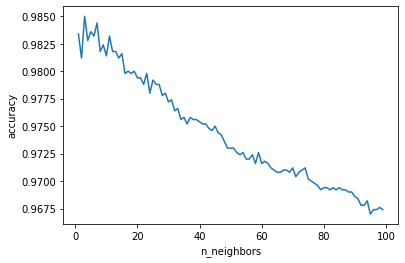

In [11]:
plt.plot(neighbors,accuracy)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

KNN classifier gives best results with 3 neighbors

In [12]:
k3 = get_classifier(3)
get_metric(k3)

C:\Program Files\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.985

## Confusion Matrix

C:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


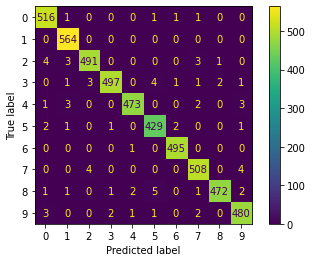

In [13]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(k3,X_test_df,y_test_df)

## Classification Report

In [14]:
from sklearn.metrics import classification_report

y_pred = k3.predict(X_test_df)

print(classification_report(y_test_df,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       520
           1       0.98      1.00      0.99       564
           2       0.99      0.98      0.98       502
           3       0.99      0.97      0.98       510
           4       0.99      0.98      0.99       482
           5       0.97      0.98      0.98       436
           6       0.99      1.00      0.99       496
           7       0.98      0.98      0.98       516
           8       0.99      0.97      0.98       485
           9       0.98      0.98      0.98       489

    accuracy                           0.98      5000
   macro avg       0.99      0.98      0.98      5000
weighted avg       0.99      0.98      0.98      5000

